A notebook for the VM-IAP project's data visualisation. Also a good place to store all the citations I'm going to need to use in my project report: pyfaidx, bedtools, pybedtools. 

Initially, just looking at any data relationships between IAPs in general and GC content.

In [240]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pybedtools
from pyfaidx import Fasta
from Bio import SeqIO
from Bio.SeqUtils import GC
mpl.rcParams['figure.dpi']= 100

mm_fasta = pybedtools.BedTool('data/GRCm38.p6.genome.fa')
iap = pybedtools.BedTool('data/clean.mm10.IAP.mended.extent.bed')
genes = pybedtools.BedTool('data/clean.genes.bed')

filt_solo = iap.filter(lambda x: len(x) <= 700)
filt_int = iap.filter(lambda x: len(x) > 700)

rand_solo = iap.filter(lambda x: len(x) <= 700).shuffle(genome='mm10', seed=1)
rand_int = iap.filter(lambda x: len(x) > 700).shuffle(genome='mm10', seed=1)

In [321]:
iap = iap.sequence(fi=mm_fasta)

solo_iap = filt_solo.sequence(fi=mm_fasta)
int_iap = filt_int.sequence(fi=mm_fasta)

rand_solo = rand_solo.sequence(fi=mm_fasta).saveas()
rand_int = rand_int.sequence(fi=mm_fasta).saveas()

WARNING. chromosome (chr5_JH584299_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr5_JH584299_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrX_GL456233_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr5_JH584299_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr4_JH584293_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrX_GL456233_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chrY_JH584301_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr5_JH584299_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr5_JH584299_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr5_JH584299_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr5_JH584299_random) was not found in the FASTA file. Skipping.
WARNING. chromosome (chr5_JH584299_random) was not fou

In [221]:
iap_len = [len(rec) for rec in SeqIO.parse(iap.seqfn, "fasta")]
solo_len = [len(rec) for rec in SeqIO.parse(solo_iap.seqfn, "fasta")]
int_len = [len(rec) for rec in SeqIO.parse(int_iap.seqfn, "fasta")]

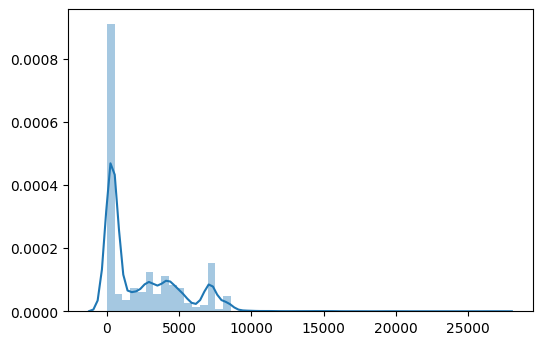

In [178]:
sns.distplot(iap_len)

In [179]:
iap_gc = [GC(rec.seq) for rec in SeqIO.parse(iap.seqfn, "fasta")]
solo_gc = [GC(rec.seq) for rec in SeqIO.parse(solo_iap.seqfn, "fasta")]
int_gc = [GC(rec.seq) for rec in SeqIO.parse(int_iap.seqfn, "fasta")]
print(len(iap_gc))
print(len(solo_gc))
print(len(int_gc))

randsolo_gc = [GC(rec.seq) for rec in SeqIO.parse(rand_solo.seqfn, "fasta")]
randint_gc = [GC(rec.seq) for rec in SeqIO.parse(rand_int.seqfn, "fasta")]
print(len(randsolo_gc))
print(len(randint_gc))

10633
5340
5293
5330
5284


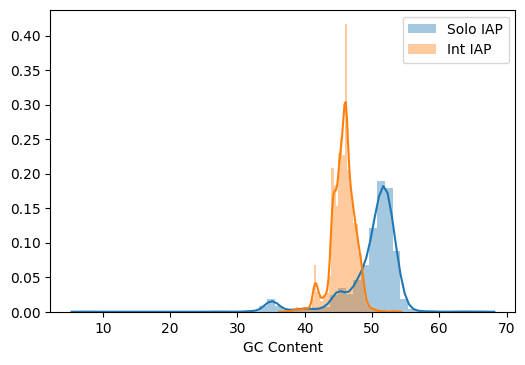

In [180]:
sns.distplot(solo_gc, label='Solo IAP')
sns.distplot(int_gc, label='Int IAP')
plt.xlabel('GC Content')
plt.legend()

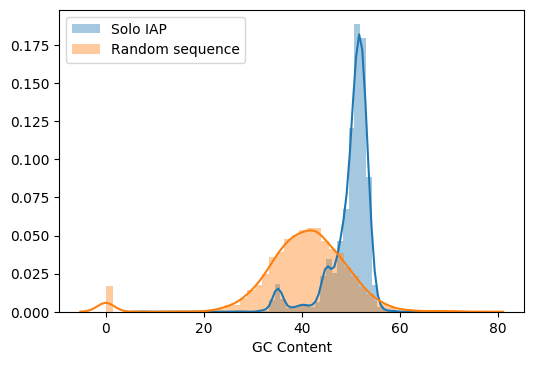

In [181]:
sns.distplot(solo_gc, label='Solo IAP')
sns.distplot(randsolo_gc, label='Random sequence')
plt.xlabel('GC Content')
plt.legend()

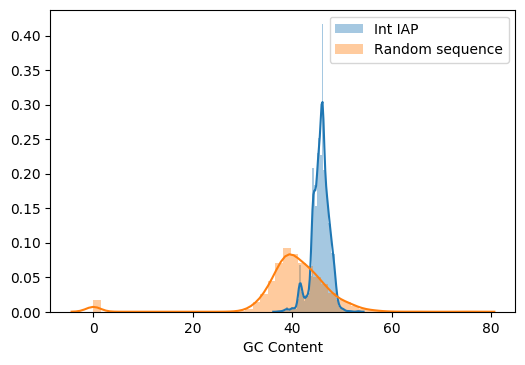

In [182]:
sns.distplot(int_gc, label='Int IAP')
sns.distplot(randint_gc, label='Random sequence')
plt.xlabel('GC Content')
plt.legend()

In [183]:
flank_solo = iap.filter(lambda x: len(x) <= 700).flank(genome='mm10', b=10000).sequence(fi=mm_fasta)
flank_solo_gc = [GC(rec.seq) for rec in SeqIO.parse(flank_solo.seqfn, "fasta")]

flank_int = iap.filter(lambda x: len(x) > 700).flank(genome='mm10', b=10000).sequence(fi=mm_fasta)
flank_int_gc = [GC(rec.seq) for rec in SeqIO.parse(flank_int.seqfn, "fasta")]

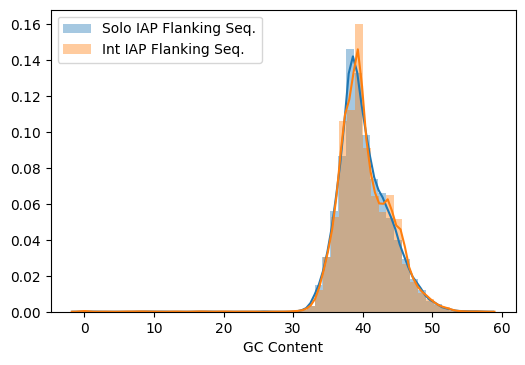

In [184]:
sns.distplot(flank_solo_gc, label='Solo IAP Flanking Seq.')
sns.distplot(flank_int_gc, label='Int IAP Flanking Seq.')
plt.xlabel('GC Content')
plt.legend()

In [193]:
genes_sort = genes.sort()

In [222]:
iap_solo = iap.filter(lambda x: len(x) <= 700).saveas()
iap_solo = solo.sort()
solo_genedist = iap_solo.closest(genes_sort, d=True)

iap_int = iap.filter(lambda x: len(x) > 700).saveas()
iap_int = iap_int.sort()
int_genedist = iap_int.closest(genes_sort, d=True)

rand_solo = rand_solo.sort()
rsolo_genedist = rand_solo.closest(genes_sort, d=True)

rand_int = rand_int.sort()
rint_genedist = rand_solo.closest(genes_sort, d=True)

In [223]:
dataframe_names = range(19)

solo_dataframe = solo_genedist.to_dataframe(names=dataframe_names)
solo_array = solo_dataframe.to_numpy()
print(solo_array.shape)

int_dataframe = int_genedist.to_dataframe(names=dataframe_names)
int_array = int_dataframe.to_numpy()
print(int_array.shape)

(8446, 19)
(8040, 19)


In [224]:
rsolo_dataframe = rsolo_genedist.to_dataframe(names=dataframe_names)
rsolo_array = rsolo_dataframe.to_numpy()
print(rsolo_array.shape)

rint_dataframe = rint_genedist.to_dataframe(names=dataframe_names)
rint_array = rint_dataframe.to_numpy()
print(rint_array.shape)

(9283, 19)
(9283, 19)


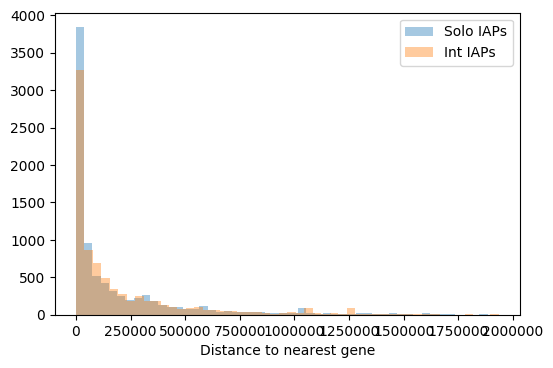

In [232]:
sns.distplot(solo_array[:, 18], label='Solo IAPs', kde=False)
sns.distplot(int_array[:, 18], label='Int IAPs', kde=False)
plt.xlabel('Distance to nearest gene')
plt.legend()

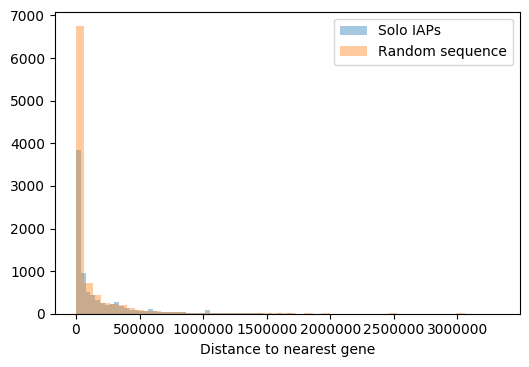

In [228]:
sns.distplot(solo_array[:,18], label='Solo IAPs', kde=False)
sns.distplot(rsolo_array[:,18], label='Random sequence', kde=False)
plt.xlabel('Distance to nearest gene')
plt.legend()

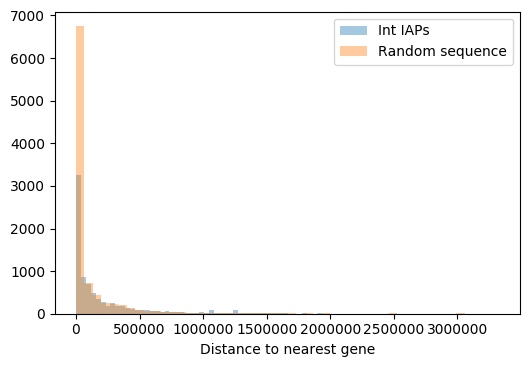

In [230]:
sns.distplot(int_array[:,18], label='Int IAPs', kde=False)
sns.distplot(rint_array[:,18], label='Random sequence', kde=False)
plt.xlabel('Distance to nearest gene')
plt.legend()

In [289]:
iap_dataframe = iap.to_dataframe()
iap_dataframe['chrom'] = iap_dataframe['chrom'].astype('category')
iap_dataframe['score'] = iap_dataframe['score'].astype('float64')
iap_dataframe.rename(columns={'score':'element length'}, inplace=True)
iap_dataframe['state'] = pd.cut(iap_dataframe['element length'], bins=[0, 700, float('Inf')], labels=['solo', 'int'])

,chrom,start,end,name,element length,strand,state
0,chr1,95057294,95057326,151177,33.0,-,solo
1,chr1,20055335,20055371,25136,37.0,-,solo
2,chr1,100567693,100567739,159399,47.0,+,solo
3,chr1,100931364,100931413,160006,50.0,+,solo
4,chr1,60586644,60586694,91370,51.0,-,solo
...,...,...,...,...,...,...,...
10628,chrY,78114612,78126000,4625352,11389.0,+,int
10629,chrY,68871130,68886597,4610940,15468.0,-,int
10630,chrY,76707764,76723231,4623137,15468.0,+,int
10631,chrY,48802527,48818126,4581271,15600.0,+,int


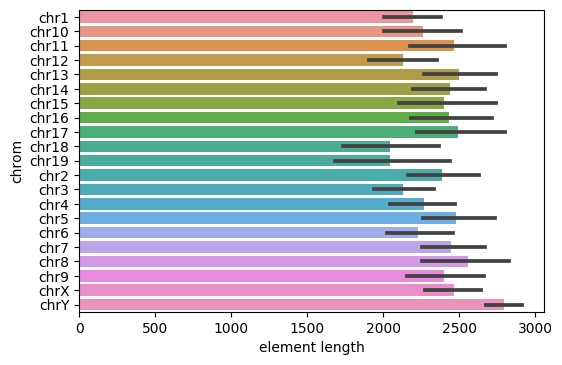

In [280]:
sns.barplot(y="chrom", x="element length", data=iap_dataframe)

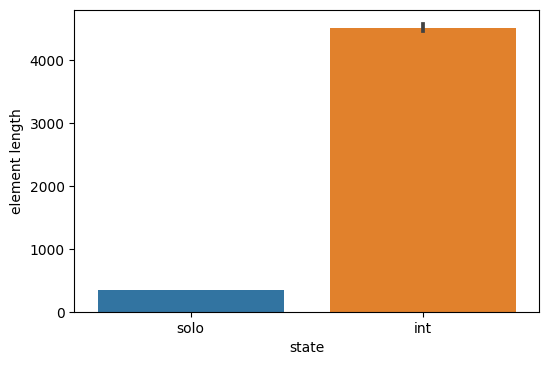

In [291]:
sns.barplot(x='state', y='element length', data=iap_dataframe)